In [1]:
#CSC620
#HA14
#Paula Abigail Tam <921850992>

**Lesson 1**: Deep Learning and Natural Language

1. Text Classification
2. Speech Recognition
3. Machine Translation
4. Question Answering / Chatbots
5. Language Modeling
6. Document Summarization
7. Caption Generation
8. Sentiment Analysis
9. Word Embeddings
10. Spell Checking

In [2]:
#Lesson 2: Cleaning Text Data

import nltk
from nltk.corpus import gutenberg
#gutenberg.fileids()

In [3]:
emma = gutenberg.raw('austen-emma.txt')
from nltk.tokenize import word_tokenize
tokens = word_tokenize(emma)
#print(tokens) #double checking tokens
words = [word.lower() for word in tokens if word.isalnum()] #if it is a number or a word
#print(words) #double checking words

#creating a new file
f = open("emma-tokenized-words.txt", "w") #using w for write 
f.write(' '.join(words)) #whitespace between each word
f.close()

f = open("emma-tokenized-words.txt", "r")
print(f.read()) #double checking that the file really was created

#Lesson 2 END---

emma by jane austen 1816 volume i chapter i emma woodhouse handsome clever and rich with a comfortable home and happy disposition seemed to unite some of the best blessings of existence and had lived nearly years in the world with very little to distress or vex her she was the youngest of the two daughters of a most affectionate indulgent father and had in consequence of her sister marriage been mistress of his house from a very early period her mother had died too long ago for her to have more than an indistinct remembrance of her caresses and her place had been supplied by an excellent woman as governess who had fallen little short of a mother in affection sixteen years had miss taylor been in woodhouse family less as a governess than a friend very fond of both daughters but particularly of emma between it was more the intimacy of sisters even before miss taylor had ceased to hold the nominal office of governess the mildness of her temper had hardly allowed her to impose any restrain

In [4]:
#Lesson 3: Bag-of-Words Model
import numpy as np
import pandas as pd

df = pd.read_csv('./HA9_csv/train.csv') #reusing book blurbs from ha9

blurbs = df["text"].apply(lambda x: str(x))
print(blurbs)

0        This process, however, afforded me no means of...
1        It never once occurred to me that the fumbling...
2        In his left hand was a gold snuff box, from wh...
3        How lovely is spring As we looked from Windsor...
4        Finding nothing else, not even gold, the Super...
                               ...                        
19574    I could have fancied, while I looked at it, th...
19575    The lids clenched themselves together as if in...
19576    Mais il faut agir that is to say, a Frenchman ...
19577    For an item of news like this, it strikes us i...
19578    He laid a gnarled claw on my shoulder, and it ...
Name: text, Length: 19579, dtype: object


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
# list of text documents
text = blurbs
# create the transform
vectorizer = TfidfVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)
# encode document
vector = vectorizer.transform([text[0]])
# summarize encoded vector
print(vector.shape)
print(vector.toarray())

{'this': 22175, 'process': 17139, 'however': 10784, 'afforded': 455, 'me': 13678, 'no': 14817, 'means': 13696, 'of': 15145, 'ascertaining': 1300, 'the': 22085, 'dimensions': 6133, 'my': 14491, 'dungeon': 6898, 'as': 1287, 'might': 13930, 'make': 13393, 'its': 12104, 'circuit': 3732, 'and': 837, 'return': 18588, 'to': 22393, 'point': 16634, 'whence': 24509, 'set': 19700, 'out': 15407, 'without': 24742, 'being': 2058, 'aware': 1652, 'fact': 8229, 'so': 20373, 'perfectly': 16073, 'uniform': 23314, 'seemed': 19553, 'wall': 24256, 'it': 12093, 'never': 14726, 'once': 15226, 'occurred': 15107, 'that': 22080, 'fumbling': 9267, 'be': 1926, 'mere': 13836, 'mistake': 14076, 'in': 11236, 'his': 10585, 'left': 12765, 'hand': 10146, 'was': 24326, 'gold': 9740, 'snuff': 20368, 'box': 2594, 'from': 9207, 'which': 24527, 'he': 10316, 'capered': 3127, 'down': 6679, 'hill': 10553, 'cutting': 5258, 'all': 632, 'manner': 13471, 'fantastic': 8333, 'steps': 20966, 'took': 22447, 'incessantly': 11278, 'with'

In [6]:
from keras.preprocessing.text import Tokenizer
docs = blurbs
# create the tokenizer
t = Tokenizer()
# fit the tokenizer on the documents
t.fit_on_texts(docs)
# summarize what was learned
print(t.word_counts)
print(t.document_count)
print(t.word_index)
print(t.word_docs)
# integer encode documents
encoded_docs = t.texts_to_matrix(docs, mode='count')
print(encoded_docs)

#Lesson 3 END---

OrderedDict([('this', 2613), ('process', 17), ('however', 358), ('afforded', 38), ('me', 2985), ('no', 1692), ('means', 168), ('of', 20953), ('ascertaining', 5), ('the', 35559), ('dimensions', 21), ('my', 5418), ('dungeon', 10), ('as', 3840), ('i', 10741), ('might', 629), ('make', 280), ('its', 1272), ('circuit', 11), ('and', 17953), ('return', 168), ('to', 12838), ('point', 200), ('whence', 27), ('set', 153), ('out', 712), ('without', 377), ('being', 425), ('aware', 57), ('fact', 159), ('so', 1575), ('perfectly', 36), ('uniform', 9), ('seemed', 544), ('wall', 115), ('it', 4868), ('never', 570), ('once', 423), ('occurred', 70), ('that', 6415), ('fumbling', 7), ('be', 2393), ('a', 10742), ('mere', 118), ('mistake', 22), ('in', 9456), ('his', 4095), ('left', 354), ('hand', 292), ('was', 6646), ('gold', 71), ('snuff', 9), ('box', 87), ('from', 2869), ('which', 3369), ('he', 4404), ('capered', 1), ('down', 454), ('hill', 87), ('cutting', 13), ('all', 2021), ('manner', 177), ('fantastic', 3

[[0. 4. 3. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 2. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [7]:
#Lesson 4: Word Embeddings

#I first cleaned the sentences of the Emma text in order to use it for this lesson in this block.
emma_sents = gutenberg.sents('austen-emma.txt') #the text

def words_in_sent(sent): #list comprehension for all the words
    sent_words = [word.lower() for word in sent if word.isalnum()]
    return sent_words

def clean_sents(list_of_sents): #another list comprehension for cleaning
    cleaned = [words_in_sent(x) for x in list_of_sents]
    return(cleaned)

emma_sents_clean = clean_sents(emma_sents)

print(emma_sents_clean) #to check if it cleaned

[['emma', 'by', 'jane', 'austen', '1816'], ['volume', 'i'], ['chapter', 'i'], ['emma', 'woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', 'and', 'had', 'lived', 'nearly', 'twenty', 'one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her'], ['she', 'was', 'the', 'youngest', 'of', 'the', 'two', 'daughters', 'of', 'a', 'most', 'affectionate', 'indulgent', 'father', 'and', 'had', 'in', 'consequence', 'of', 'her', 'sister', 's', 'marriage', 'been', 'mistress', 'of', 'his', 'house', 'from', 'a', 'very', 'early', 'period'], ['her', 'mother', 'had', 'died', 'too', 'long', 'ago', 'for', 'her', 'to', 'have', 'more', 'than', 'an', 'indistinct', 'remembrance', 'of', 'her', 'caresses', 'and', 'her', 'place', 'had', 'been', 'supplied', 'by', 'an', 'excellent', 'woman', 'as', 'governess', 'who', 'had', 'fall

In [8]:
from gensim.models import Word2Vec
# define training data
sentences = emma_sents_clean
# train model
model = Word2Vec(sentences, min_count=1)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.key_to_index) #changed vocab to key_to_index
print(words)
# access vector for one word
print(model.wv['sentence']) #added .wv

Word2Vec<vocab=7088, vector_size=100, alpha=0.025>
['to', 'the', 'and', 'of', 'i', 'a', 'it', 'her', 'was', 'she', 'in', 'not', 'you', 'be', 'he', 'that', 'had', 'but', 'as', 'for', 'have', 'is', 'with', 'very', 'mr', 'his', 'at', 'so', 's', 'emma', 'all', 'could', 'would', 'been', 'him', 'no', 'my', 'mrs', 'on', 'any', 'do', 'were', 'miss', 'me', 'by', 'will', 'must', 'which', 'there', 'from', 'they', 'what', 'this', 'harriet', 'or', 'such', 'much', 'if', 'said', 'more', 'an', 'are', 'one', 'weston', 'every', 'them', 'am', 'than', 'well', 'thing', 'knightley', 'elton', 'think', 'how', 'should', 'your', 'when', 'little', 'being', 'never', 'good', 'did', 'we', 'only', 'know', 'might', 'woodhouse', 'say', 'now', 'their', 'own', 'jane', 'who', 'can', 'quite', 'herself', 'time', 'great', 'some', 'nothing', 'too', 'before', 'has', 'about', 'most', 'fairfax', 'dear', 'always', 'man', 'thought', 'churchill', 'soon', 'see', 'other', 'may', 'again', 'shall', 'without', 'out', 'first', 'frank', 

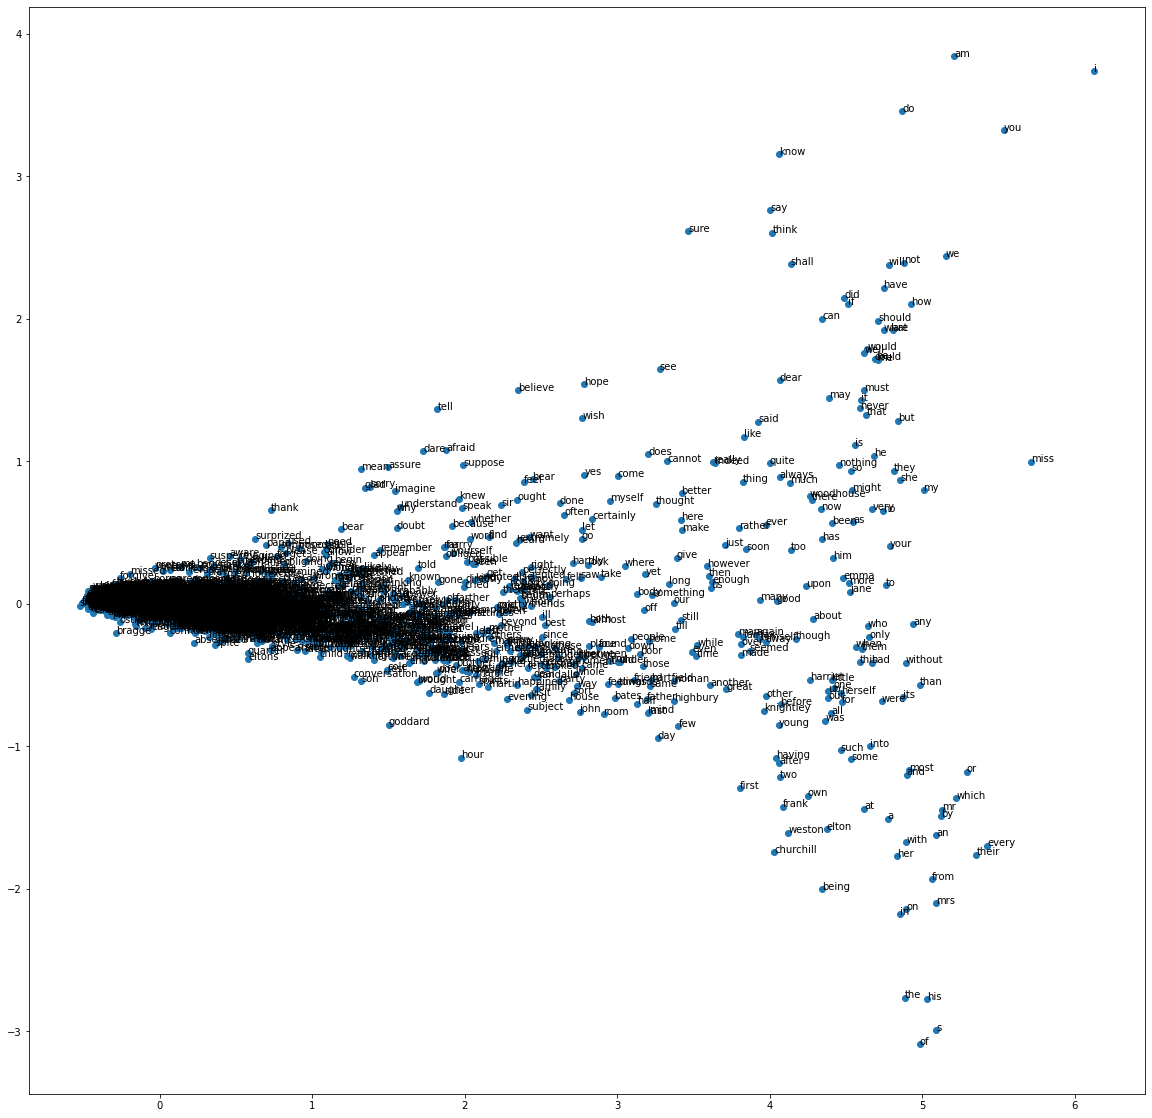

In [9]:
from sklearn.decomposition import PCA
from matplotlib import pyplot
# define training data
sentences = emma_sents_clean
# train model
model = Word2Vec(sentences, min_count=1)
# fit a 2D PCA model to the vectors
X = model.wv[model.wv.key_to_index] #added .wv and changed vocab to key_to_index
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.figure(figsize=(20,20)) #I added this in order for the scatterplot to be bigger
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.key_to_index)
for i, word in enumerate(words):
 pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

#Lesson 4 END---

In [10]:
#Lesson 5: Learned Embedding
#also followed this blog post for this lesson: https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding #changed keras.layers.embeddings to just keras.layers
from keras.layers import Hashing #for the one-hot
from keras.utils import pad_sequences #to get the pad_sequences, https://www.tensorflow.org/api_docs/python/tf/keras/utils/pad_sequences

# define documents
docs = ['Well done!',
 'Good work',
 'Great effort',
 'nice work',
 'Excellent!',
 'Weak',
 'Poor effort!',
 'not good',
 'poor work',
 'Could have done better.']
# define class labels
labels = np.array([1,1,1,1,1,0,0,0,0,0])

# integer encode the documents
vocab_size = 50
one_hot = Hashing(num_bins=vocab_size, output_mode="one_hot")
encoded_docs = [one_hot(d) for d in docs]
print(encoded_docs)

# pad documents to a max length of 4 words
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

# define the model
model = Sequential()
model.add(Embedding(vocab_size, 8, input_length=max_length))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# summarize the model
print(model.summary())

#Lesson 5 END---

[<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)>, <tf.Tensor: shape=(50,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)>, <tf.Tensor: shape=(50,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)>, <tf.Tensor: shape=(50,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
 

In [13]:
#Lesson 6: Classifying Text

from keras.layers import Conv1D
from keras.layers import MaxPooling1D

# define problem
vocab_size = 100
max_length = 200
# define model
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=max_length))
model.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 200, 100)          10000     
                                                                 
 conv1d_1 (Conv1D)           (None, 193, 32)           25632     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 96, 32)           0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                30730     
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                      

Research and Report: Best Practices for Embeddings + CNNs

Pages I looked at:
https://machinelearningmastery.com/best-practices-document-classification-deep-learning/
https://towardsdatascience.com/a-guide-to-an-efficient-way-to-build-neural-network-architectures-part-ii-hyper-parameter-42efca01e5d7

Typically, it is good practice to have CNNs start off with a smaller filter (using odd-number sizes, e.g 3x3 or 5x5 etc.), which allows for gathering local information. You can then gradually increase the filter size to get more global information. The number of channels should also start off small in order to detect features. You can later increase the number of channels.

You can keep adding layers until it is overfitted, then you could add stuff to regulize it to prevent overfitting.
